In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [19]:
# 1. load data
df = pd.read_csv('wine_dataset.csv')
# 2. drop string columns
df_numeric = df.loc[:, df.dtypes != 'object']

In [25]:
# 3. create scaling with MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_numeric)

#4 . build Hierarchical Clustering with linage on the data
linked = linkage(data_scaled, method='ward')

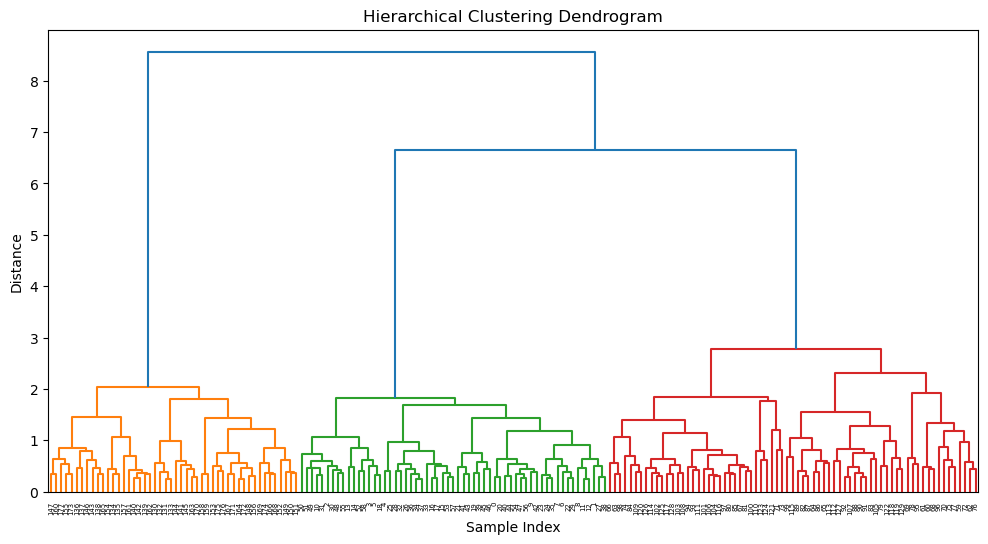

In [29]:
# 5. plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [35]:
# 6. select k according to plot
k = 3
clusters = fcluster(linked, k, criterion='maxclust')
# 7 added to the df
df['cluster'] = clusters
# 8